# CLASSIFICATION PROJECT
### AIR POLLUTION DATASET 
This dataset focuses on air quality assessment across various regions. It contains 5000 samples and captures critical environmental and demographic factors that influence pollution levels. The Analysis is to predict the Air Quality by creating different models, below mentioned are the steps on which the models are created and how the accuracy is tested.

## 1. IMPORTING THE DATA

In [1]:
#Importing the data and Suppressing the Warnings. 
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
APD = pd.read_csv(r"C:\Users\msour\OneDrive\Documents\IVY\Project python ML\Classification_Project_pollution_dataset.csv")
APD.head(5)

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


## 2. REMOVING DUPLICATES

In [2]:
#Removing any kind of duplicate present in the data. 
print(f"The original dataset contains {APD.shape[0]} rows")
APD.drop_duplicates()
print(f"After removing the duplicate records, it contains {APD.shape[0]} rows. \nHence no duplicate columns")

The original dataset contains 5000 rows
After removing the duplicate records, it contains 5000 rows. 
Hence no duplicate columns


## 3. BASIC DATA ANALYSIS

In [3]:
#Basic Data Analysis
APD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


There is no missing values in the data, hence we do not have to treat any missing values or remove columns based on that.

In [4]:
APD.nunique()

Temperature                      362
Humidity                         723
PM2.5                            815
PM10                             955
NO2                              445
SO2                              348
CO                               265
Proximity_to_Industrial_Areas    179
Population_Density               683
Air Quality                        4
dtype: int64

Here all the columns are continous except the target variable that is the Air Quality column which is Categorical.  
<b>Predictors</b> = ['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO','Proximity_to_Industrial_Areas', 'Population_Density']  
<b>Target</b> = 'Air Quality'

## 4. VISUAL EXPLORATORY DATA ANALYSIS  
### 4.1. UNIVARIATE ANALYSIS

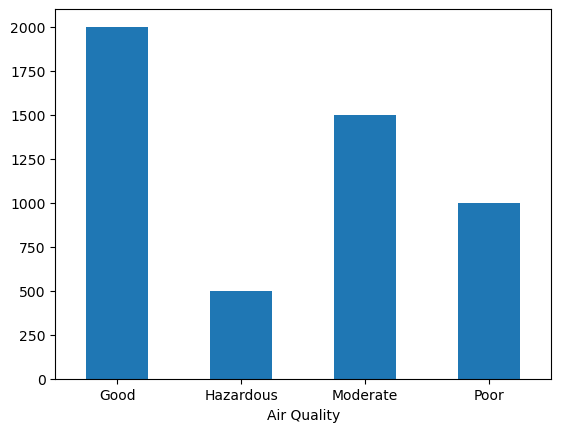

In [5]:
#checking the distribution for the target variable 
import matplotlib.pyplot as plt
APD.groupby(['Air Quality']).size().plot.bar()
plt.tick_params(axis='x', labelrotation=0);

The Dataset contains a fair number of records for each of the category in the Target variable. Hence, it is good for Machine Learning. 

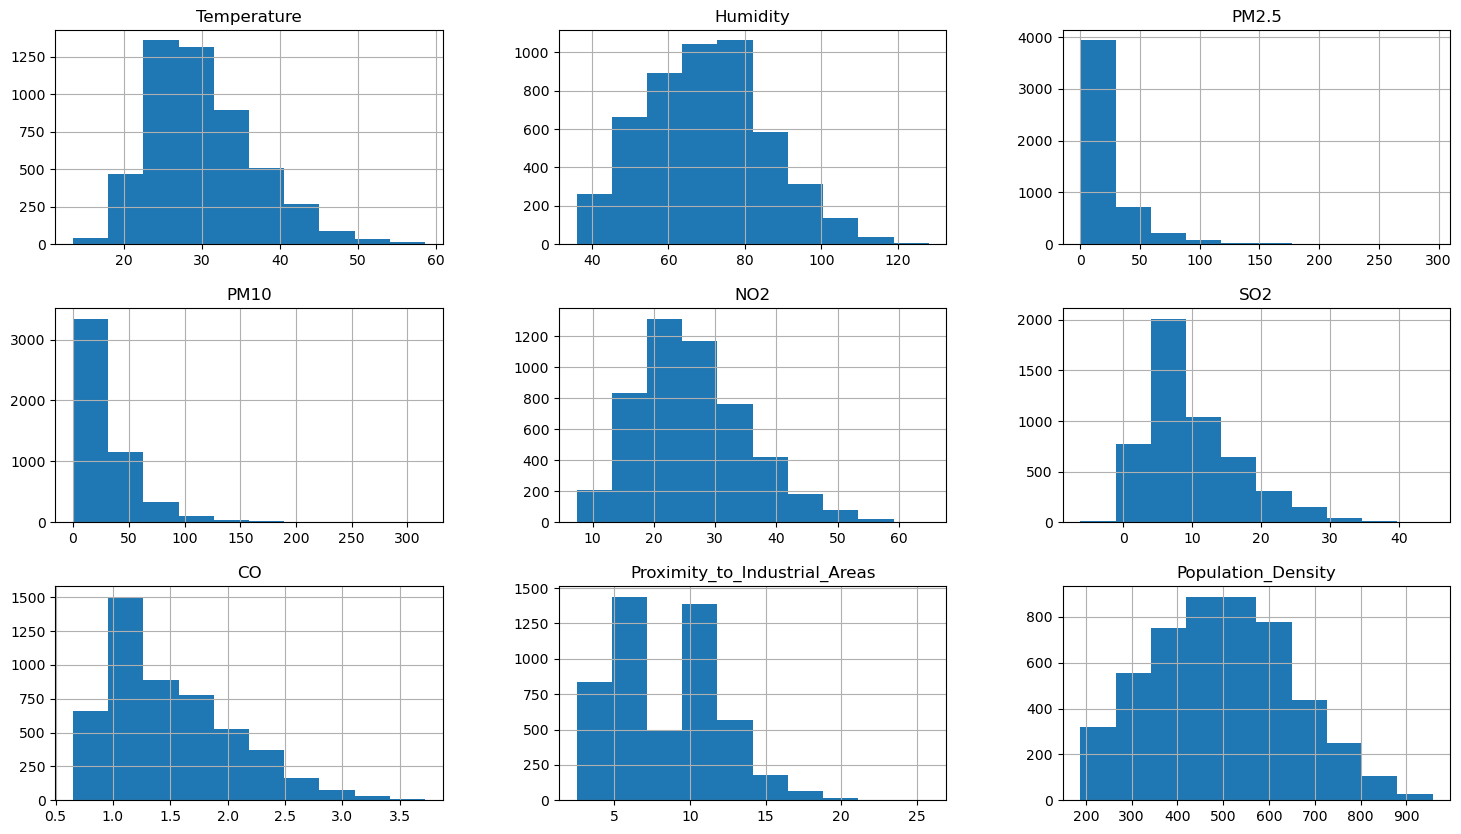

In [6]:
#Now checking the distribution for each of the predictors.
Contvar = ["Temperature","Humidity","PM2.5","PM10","NO2","SO2","CO","Proximity_to_Industrial_Areas","Population_Density"]
APD[Contvar].hist(figsize=(18,10));

Here as we see, that each of the predictors has a good ditribution and also there is no outliers to be treated. We can simply carry on to the Bivariate Analysis.

### 4.2. BIVARIATE ANALYSIS

In [7]:
#defining a Function that plots Categorical vs Continous data
def contpred_vs_cattarget(inpdata,contpred,cattarget):
    import matplotlib.pyplot as plt
    import math
    fig, subplot=plt.subplots(ncols = 3, nrows = math.ceil(len(contpred)/3),figsize = (24,15))
    fig.suptitle("Categorical target vs Continuous Predictors",fontsize=16);
    subplot = subplot.flatten()
    for i, pred in enumerate(contpred):
        inpdata.groupby(cattarget).mean()[pred].plot(kind='bar', ax=subplot[i])
        subplot[i].set_title(f"{cattarget} vs {pred}",fontsize=14)
        subplot[i].tick_params(axis='x', labelrotation=0)

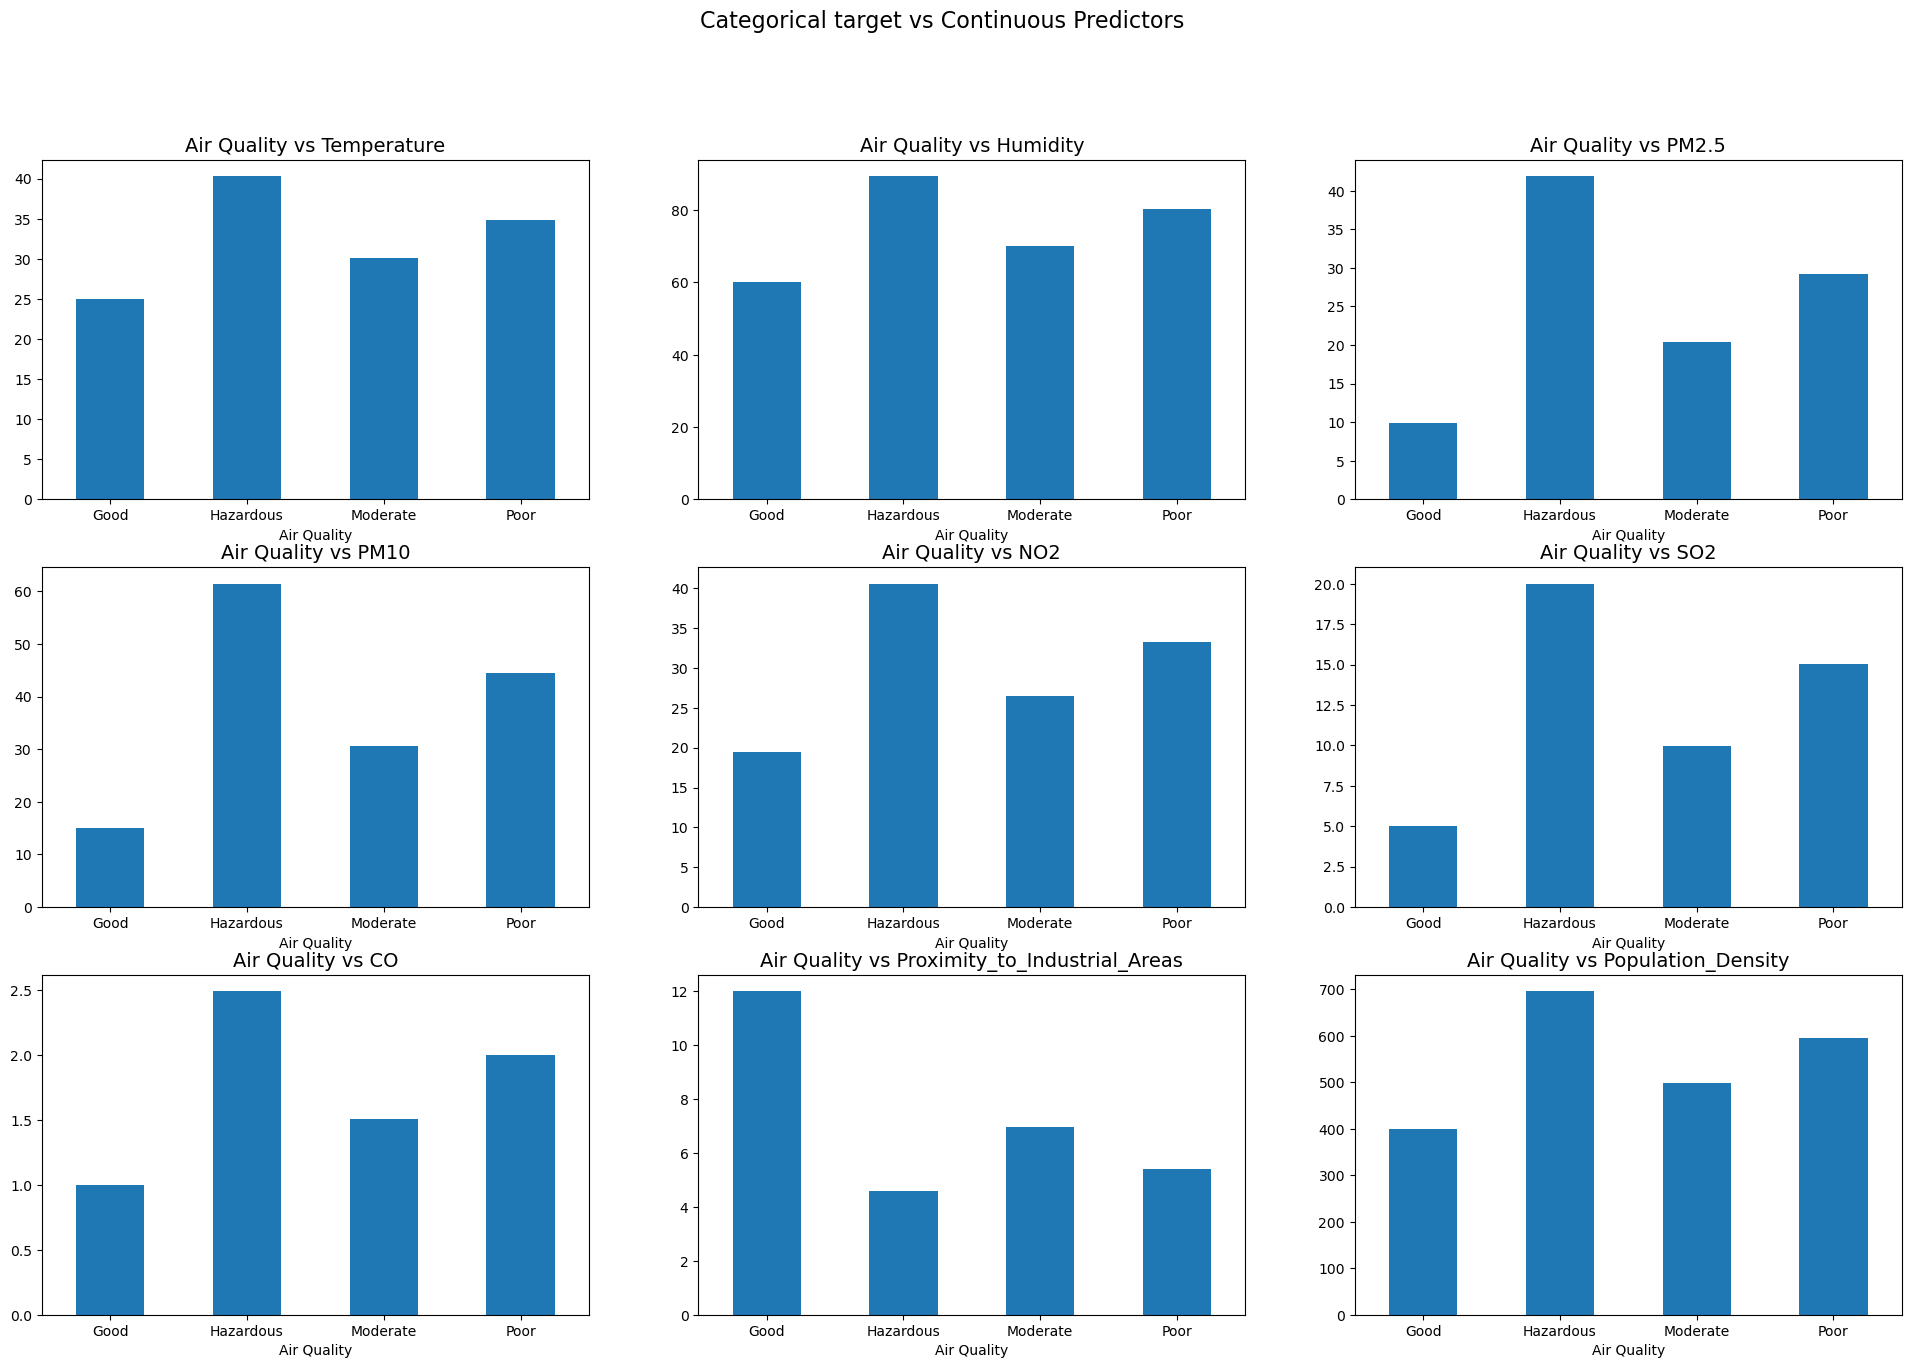

In [8]:
#Bivariate analysis Continous vs Categorical
ContPredictors = ["Temperature","Humidity","PM2.5","PM10","NO2","SO2","CO","Proximity_to_Industrial_Areas","Population_Density"]
Target = "Air Quality"
contpred_vs_cattarget(inpdata = APD,contpred=ContPredictors,cattarget=Target)

In [9]:
#Bivariate Analysis - Continuous vs Target (Box plot)
def bivariateboxplot(inpdata,Contvar,Target):
    import matplotlib.pyplot as plt
    import math
    fig, subplot = plt.subplots(ncols=3,nrows=math.ceil(len(Contvar)/3),figsize = (25,20))
    fig.suptitle("Bivariate Analysis for Continuous Variables", fontsize=24, fontweight='bold')
    subplot = subplot.flatten()
    for i,cont in enumerate(Contvar):
        inpdata.boxplot(column=cont,by=Target,ax=subplot[i])
        subplot[i].set_title(f"{cont} vs {Target}")
    plt.suptitle("")

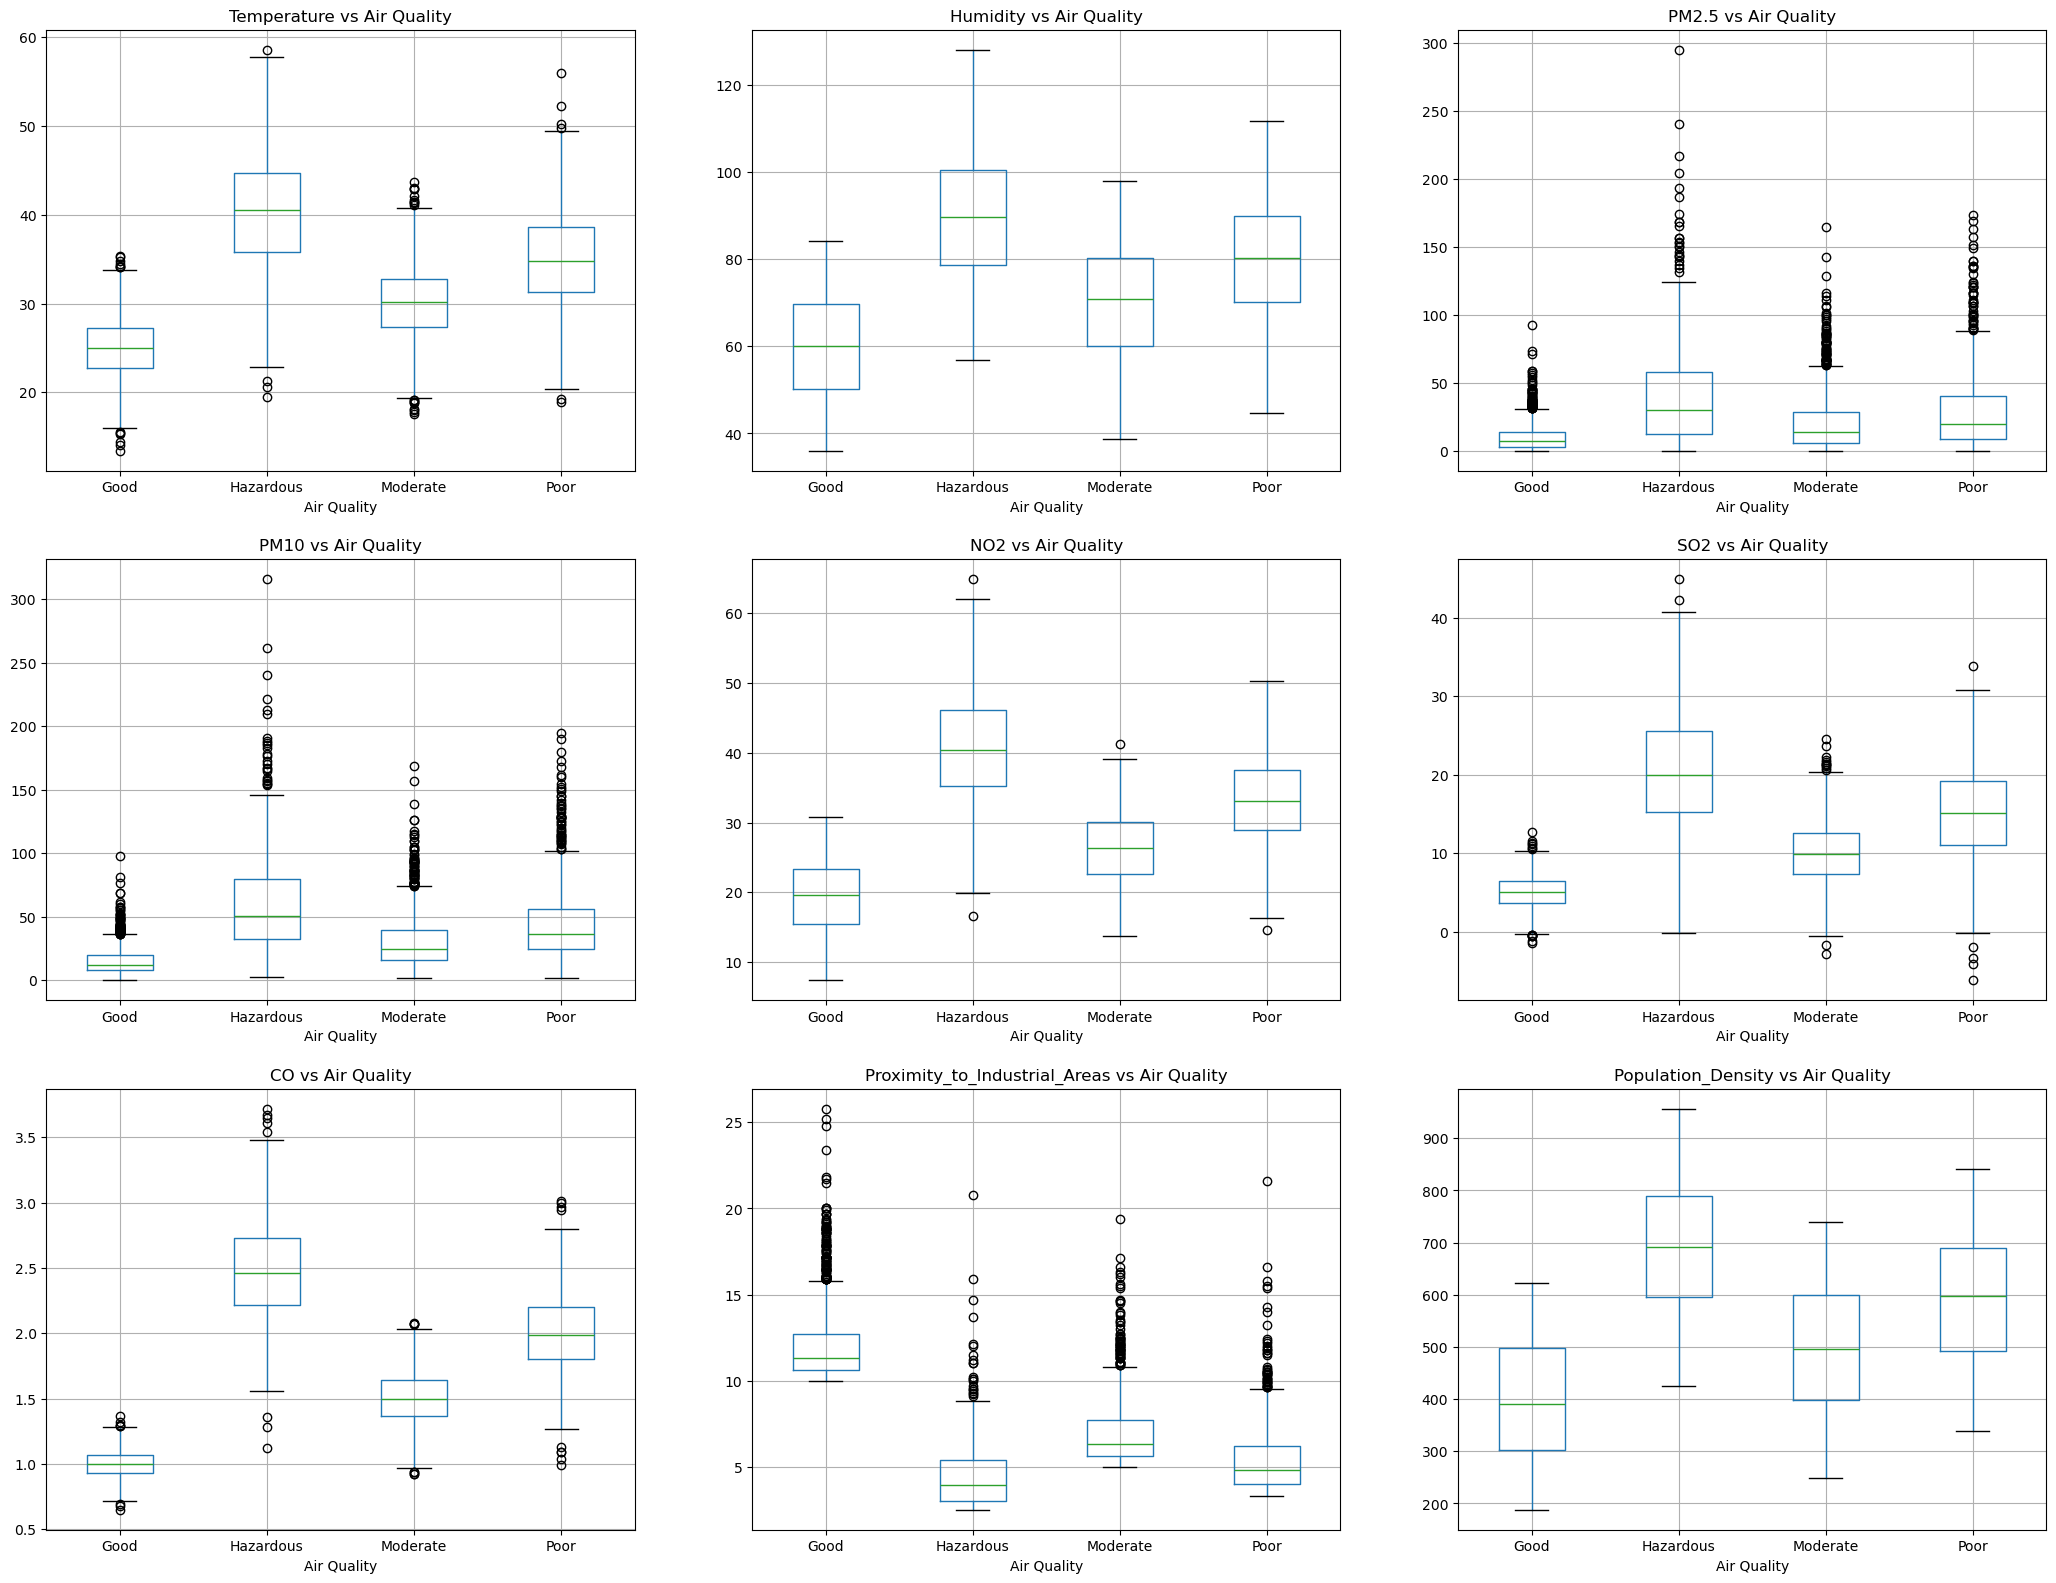

In [10]:
ContPredictors = ["Temperature","Humidity","PM2.5","PM10","NO2","SO2","CO","Proximity_to_Industrial_Areas","Population_Density"]
Target = "Air Quality"
bivariateboxplot(inpdata=APD,Contvar=ContPredictors,Target=Target)

### 4.2. BIVARIATE ANALYSIS - ANOVA TEST

In [11]:
#Defining a function for ANOVA Test
def ANOVATEST(inpdata,contpred,cattarget):
    from scipy.stats import f_oneway
    Selected_Predictors = []
    for pred in contpred:
        grouplist = inpdata.groupby(cattarget)[pred].apply(list)
        Anova_results = f_oneway(*grouplist)
        if(Anova_results[1]<0.05):
            print(f"{pred} is correlated with the Target variable which is {Anova_results[1]}")
            Selected_Predictors.append(pred)
        else:
            print(f"{pred} is not correlated with the Target variable which is {Anova_results[1]}")
    return Selected_Predictors

In [12]:
print("\nHence the selected predictors would be\n",ANOVATEST(APD,contpred=ContPredictors,cattarget=Target))

Temperature is correlated with the Target variable which is 0.0
Humidity is correlated with the Target variable which is 0.0
PM2.5 is correlated with the Target variable which is 6.991035853584263e-209
PM10 is correlated with the Target variable which is 0.0
NO2 is correlated with the Target variable which is 0.0
SO2 is correlated with the Target variable which is 0.0
CO is correlated with the Target variable which is 0.0
Proximity_to_Industrial_Areas is correlated with the Target variable which is 0.0
Population_Density is correlated with the Target variable which is 0.0

Hence the selected predictors would be
 ['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Proximity_to_Industrial_Areas', 'Population_Density']


In [13]:
Predictors = ["Temperature","Humidity","PM2.5","PM10","NO2","SO2","CO","Proximity_to_Industrial_Areas","Population_Density"]
Target = "Air Quality"

## 5. DATA PROCESSING FOR MACHINE LEARNING

The dataset is transformed to all numeric before fitting to any of the classification model. In this case the Target variable that is "Air Quality" is converted from ordinal categorical to numeric.

In [14]:
#assigning the data for machine learning.
DML= APD[["Temperature","Humidity","PM2.5","PM10","NO2","SO2","CO","Proximity_to_Industrial_Areas","Population_Density",
          "Air Quality"]]

In [15]:
#defining a function that converts ordinal categorical data into numeric
def categoricaltonumeric(inpdata,catvar):
    import pandas as pd
    unique_category_list=[]
    for i in catvar:
        uniques = inpdata[i].unique().tolist()
        unique_category_list.append(uniques)
    for i,col_order in zip(catvar,unique_category_list):
        inpdata[i] = pd.Categorical(inpdata[i],categories = col_order,ordered = True)
        inpdata[i] = inpdata[i].cat.codes
    return inpdata

In [16]:
DML_Numeric = DML.copy()
DML_Numeric = categoricaltonumeric(inpdata = DML_Numeric,catvar = ["Air Quality"])
DML_Numeric.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,0
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,0
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,0
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,1
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,1


In [17]:
#Taking the data into arrays 
Predictors = ["Temperature","Humidity","PM2.5","PM10","NO2","SO2","CO","Proximity_to_Industrial_Areas","Population_Density"]
Target = "Air Quality"
X = DML_Numeric[Predictors].values
Y = DML_Numeric[Target].values
print(f"The dimension of X and Y are {X.shape} and {Y.shape[0]} respectively")

The dimension of X and Y are (5000, 9) and 5000 respectively


In [18]:
#splitting the data into training and testing.
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=10)
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(3500, 9) (3500,) (1500, 9) (1500,)


In [19]:
#Suppressing Scientific Notation:
import numpy as np
np.set_printoptions(suppress = True)

Creating a function for Classification for 2 models and those are <b>Logistic Regression</b> and <b>Decision Tree</b>

## 6. LOGISTIC REGRESSION

In [20]:
def Classification_LogisticRegression(X,Y,cross_fold):
    #Splitting the Data into training and Testing
    from sklearn.model_selection import train_test_split
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=10)
    
    print("------------Model: Logistic Regression------------")
    from sklearn.linear_model import LogisticRegression
    from sklearn import metrics
    clfmodel = LogisticRegression(C=5, penalty = 'l2', solver = 'newton-cg')
    LOG = clfmodel.fit(X_train,Y_train)
    prediction = LOG.predict(X_test)
    
    #Measuring the Accuracy of the model on testing sampling data that is by calculating F1 score.
    print("The Classification report: \n",metrics.classification_report(Y_test,prediction))
    print("The confusion Matrix: \n",metrics.confusion_matrix(Y_test,prediction))
    F1_score = metrics.f1_score(Y_test,prediction,average = 'weighted')
    print("The accuracy of the model in Testing Sampling Data: ",round(F1_score,4))
    
    #Now Calculating the Accuracy of the model by calculating the n-cross fold validation
    from sklearn.model_selection import cross_val_score
    Accuracy_values = cross_val_score(LOG,X,Y,cv=cross_fold,scoring = 'f1_weighted')
    print(f"\nThe Accuracy Values for the {cross_fold}-fold cross validation are: \n",Accuracy_values)
    print("\nMean of the Accuracy: ",round(np.mean(Accuracy_values),4))
    print("Median of the Accuracy: ",round(np.median(Accuracy_values),4))

In [21]:
Classification_LogisticRegression(X,Y,cross_fold=7)

------------Model: Logistic Regression------------
The Classification report: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95       426
           1       0.99      1.00      1.00       630
           2       0.92      0.89      0.90       150
           3       0.91      0.84      0.88       294

    accuracy                           0.95      1500
   macro avg       0.94      0.92      0.93      1500
weighted avg       0.95      0.95      0.95      1500

The confusion Matrix: 
 [[413   6   0   7]
 [  0 630   0   0]
 [  0   0 133  17]
 [ 34   0  12 248]]
The accuracy of the model in Testing Sampling Data:  0.9486

The Accuracy Values for the 7-fold cross validation are: 
 [0.92950921 0.94142899 0.95241745 0.9341826  0.9362408  0.94219003
 0.94473135]

Mean of the Accuracy:  0.9401
Median of the Accuracy:  0.9414


## 7. DECISION TREE

In [22]:
def Classification_DecisionTree(X,Y,depth,cross_fold):
    #Splitting the Data into training and Testing
    from sklearn.model_selection import train_test_split
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=10)
    
    print("------------Model: Decision Tree------------")
    from sklearn import tree
    from sklearn import metrics
    clfmodel = tree.DecisionTreeClassifier(max_depth = 3, criterion = 'entropy')
    DT = clfmodel.fit(X_train,Y_train)
    prediction = DT.predict(X_test)
    
    #Measuring the Accuracy of the model on testing sampling data that is by calculating F1 score.
    print("The Classification report: \n",metrics.classification_report(Y_test,prediction))
    print("The confusion Matrix: \n",metrics.confusion_matrix(Y_test,prediction))
    F1_score = metrics.f1_score(Y_test,prediction,average = 'weighted')
    print("The accuracy of the model in Testing Sampling Data: ",round(F1_score,4))
    
    #Now Calculating the Accuracy of the model by calculating the n-cross fold validation
    from sklearn.model_selection import cross_val_score
    Accuracy_values = cross_val_score(DT,X,Y,cv=cross_fold,scoring = 'f1_weighted')
    print(f"\nThe Accuracy Values for the {cross_fold}-fold cross validation are: \n",Accuracy_values)
    print("\nMean of the Accuracy: ",round(np.mean(Accuracy_values),4))
    print("Median of the Accuracy: ",round(np.median(Accuracy_values),4))

In [23]:
Classification_DecisionTree(X,Y,depth = 3,cross_fold =7)

------------Model: Decision Tree------------
The Classification report: 
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       426
           1       1.00      0.98      0.99       630
           2       0.73      0.69      0.71       150
           3       0.75      0.73      0.74       294

    accuracy                           0.89      1500
   macro avg       0.84      0.83      0.84      1500
weighted avg       0.89      0.89      0.89      1500

The confusion Matrix: 
 [[401   1   0  24]
 [ 15 615   0   0]
 [  0   0 103  47]
 [ 41   0  38 215]]
The accuracy of the model in Testing Sampling Data:  0.8887

The Accuracy Values for the 7-fold cross validation are: 
 [0.88389588 0.87529437 0.86990275 0.89801755 0.87231369 0.8851659
 0.87358875]

Mean of the Accuracy:  0.8797
Median of the Accuracy:  0.8753


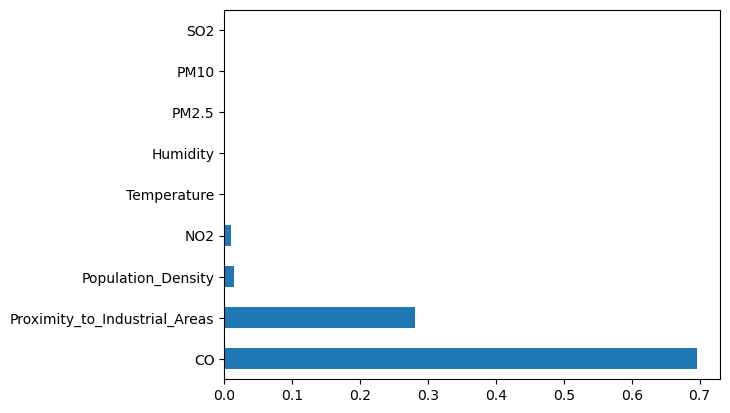

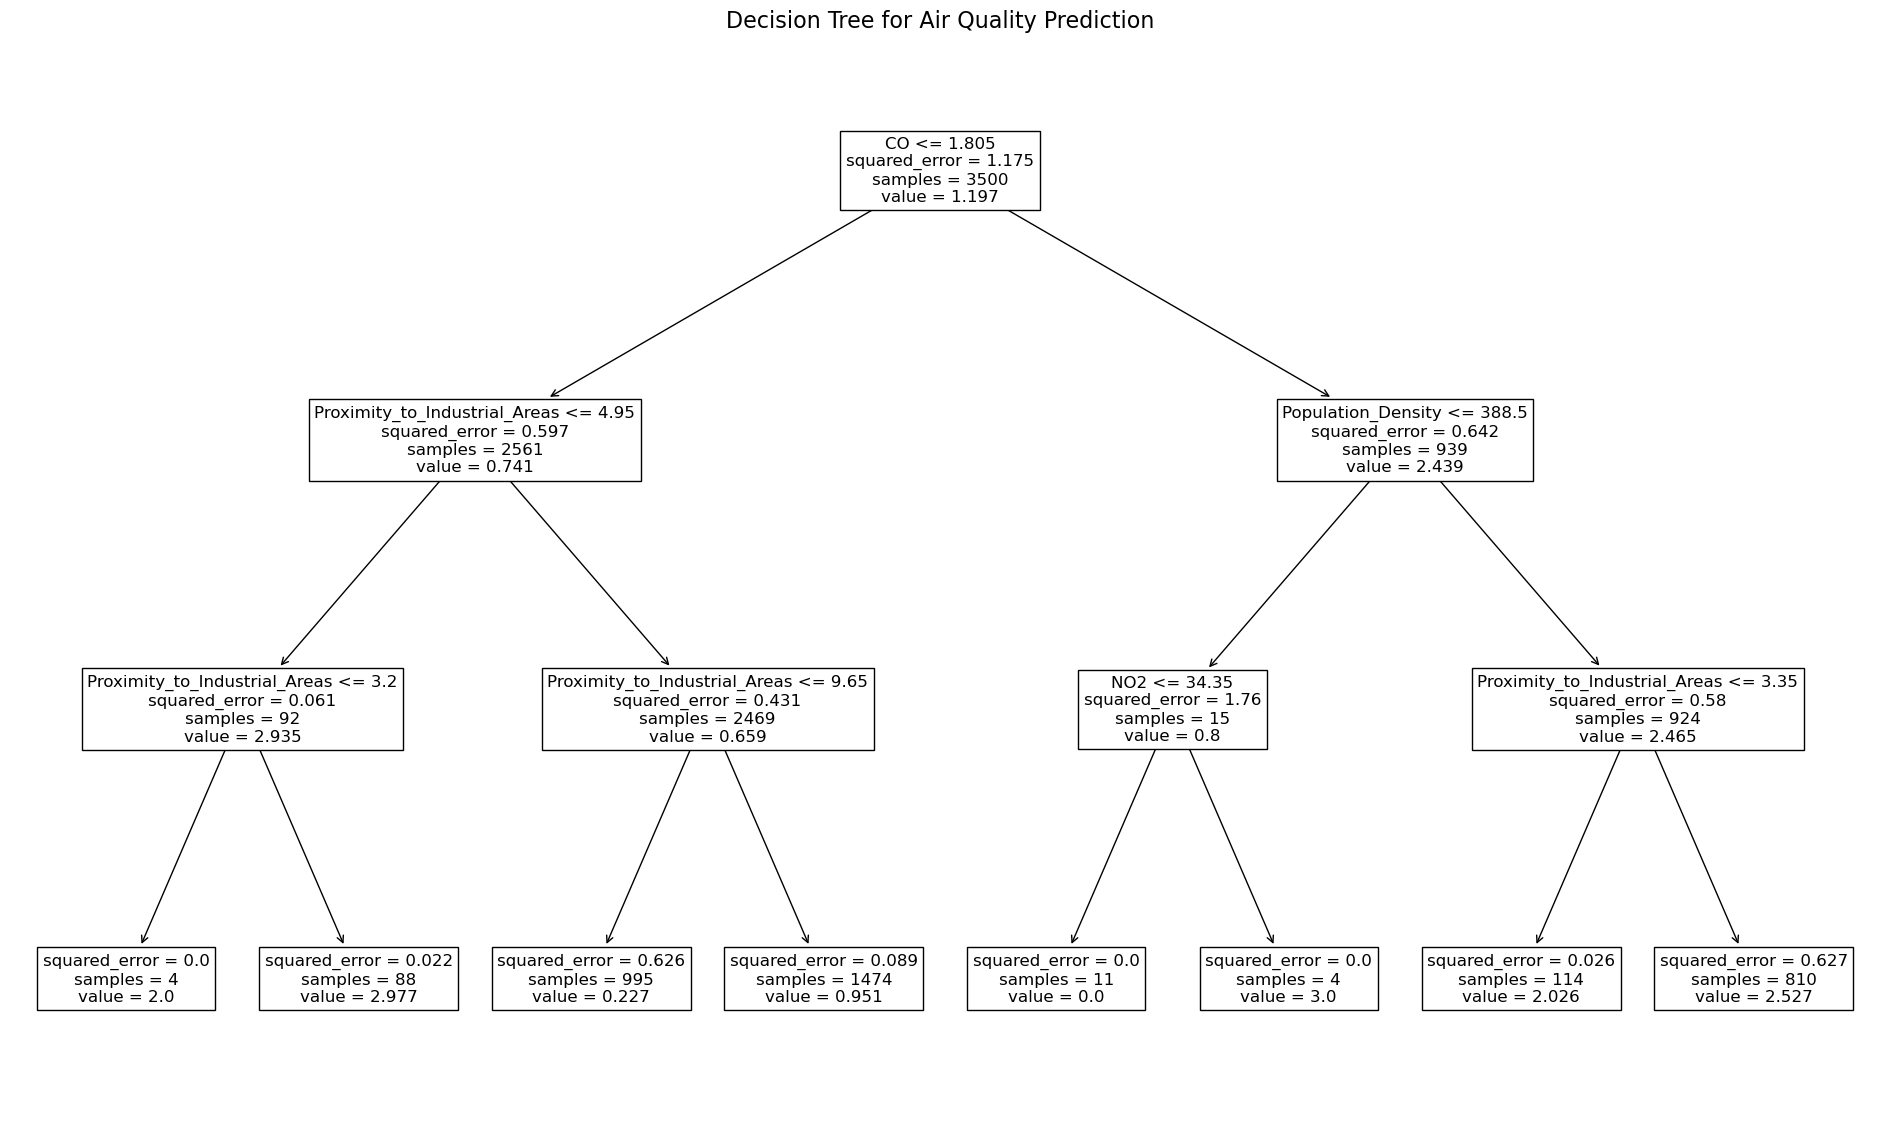

In [24]:
Predictors = ["Temperature","Humidity","PM2.5","PM10","NO2","SO2","CO","Proximity_to_Industrial_Areas","Population_Density"]
Target = "Air Quality"
#plotting decision tree and the feature importance
from sklearn.tree import DecisionTreeRegressor
clfmodel = DecisionTreeRegressor(max_depth = 3,criterion = 'squared_error')
DT = clfmodel.fit(X_train,Y_train)

#Plotting the Feature Importance
feature_importances = pd.Series(DT.feature_importances_, index = Predictors)
feature_importances.nlargest(10).plot(kind='barh')

#Plotting the decision Tree
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import plot_tree
plt.figure(figsize=(24, 14))
plot_tree(DT,max_depth=3,feature_names=Predictors,
          class_names=APD[Target].unique().astype(str).tolist(),
          label='all',precision=3,fontsize=12)

plt.title("Decision Tree for Air Quality Prediction",fontsize=16)
plt.show()